<a href="https://colab.research.google.com/github/Sinchiguano/chicagoUniversity/blob/main/MLE%20with%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

def random_data(beta, n, std_dev, maxval=100):

    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.rand(n) * maxval
    
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    return x, y 

[76.01421172 23.30626041 53.75448839 59.83898301 35.35862076 68.22936079
 10.46268055 36.60421532 13.20952011]
(50,)


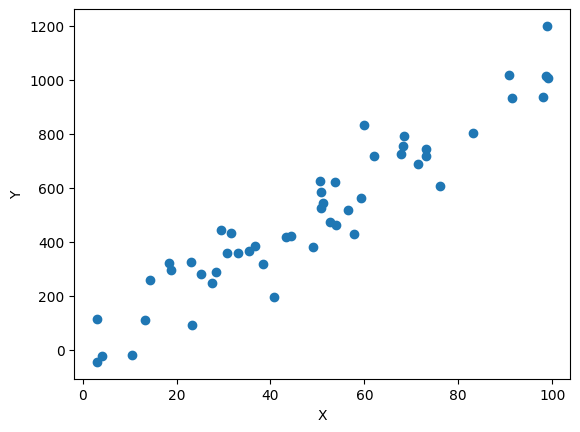

In [9]:
x,y = random_data(10, 50, 100)
print(x[1:10])
print(x.shape)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

print("Size of train sample: ", len(X_train))
print("Size of test sample: ", len(X_test))

Size of train sample:  33
Size of test sample:  17


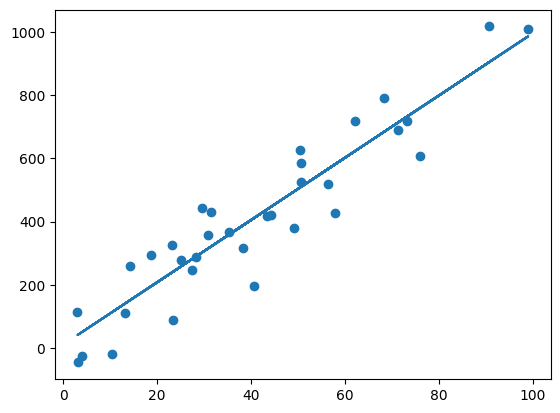

In [11]:
from scipy.optimize import minimize

# A simplified computation of the negative log likelihood, based on the derivation above.

def negative_ll(theta):
    (m, b, sigma) = theta

    y  = m*X_train + b  
    
    # Exponent from log likelihood that we are trying to maximize
    # We negate the term so that we can minimize it.
    L = (1 / (2 * sigma ** 2) * sum((y - y_train) ** 2))
    return L


# minimuze 
MLE = minimize(negative_ll, np.array([1,1,1]), method='L-BFGS-B')

(m, b, sigma) = MLE['x']

plt.scatter(X_train,y_train)
plt.plot(x, m*x + b)
plt.show()